- **Project Name**: **Netflix EDA and Clustering Analysis**


##  Project Details

- **Project Type**: EDA (Exploratory Data Analysis)  
- **Contribution**: Individual


##  **Project Summary**

In the era of streaming, understanding user preferences and content trends is crucial for platforms like **Netflix**. This project focuses on analyzing and segmenting Netflix’s content catalog using **Exploratory Data Analysis (EDA)** and **Clustering techniques**. By examining patterns across genres, release years, countries, and other attributes, we aim to extract meaningful insights that could drive better content recommendation, acquisition, and marketing strategies.

The dataset used in this project consists of Netflix's collection of **movies and TV shows**, including metadata such as **title**, **type**, **director**, **cast**, **country of origin**, **release year**, **rating**, **duration**, and **date added** to the platform. The data was thoroughly **cleaned**, **preprocessed**, and **enriched** with additional features to support insightful visual analysis and clustering.

---

###  **Data Cleaning and Preprocessing**

The initial dataset contained **missing values**, **format inconsistencies** (e.g., dates and durations), and a few **duplicate entries**. Key preprocessing steps included:

- Filling missing values in critical columns such as `country`, `rating`, and `duration` using mode and forward fill techniques  
- Extracting numeric values from the `duration` column and converting them to minutes  
- Converting `date_added` to datetime format and extracting `year_added` and `month_added`  
- Label encoding for categorical variables like `type` and `rating`  

These steps ensured the dataset was **clean and analysis-ready**.

---

###  **Exploratory Data Analysis (EDA)**

EDA played a crucial role in uncovering content patterns on Netflix:

- **Content Type**: Netflix hosts more *movies* than *TV shows*, although TV content has grown over time  
- **Genres**: Most common genres included *Dramas*, *Comedies*, and *International content*  
- **Countries**: The **U.S.** contributed the most titles, followed by **India** and the **U.K.**  
- **Release Trends**: A surge in content appeared post-2015, reflecting Netflix’s **global expansion**  
- **Ratings**: TV-MA and TV-14 were the most frequent, indicating a mature target audience  
- **Directors and Cast**: Some directors and actors appear frequently, indicating key partnerships  

A **WordCloud** visualized dominant genres, while **bar plots** and **histograms** illustrated trends in countries, ratings, and release years.

We also analyzed the **relationship between country and rating**, and how top **directors' works** were distributed across rating categories.

---

###  **Clustering with KMeans**

To segment the content, we applied **KMeans Clustering**, an **unsupervised learning** technique. Features used for clustering included:
- `release_year`
- `duration`
- `type`
- `rating`

**Clustering Steps:**
- **Outlier Detection**: Duration outliers removed using the **IQR method**
- **Feature Scaling**: Applied **StandardScaler** to standardize values
- **Elbow Method**: Used to find optimal number of clusters (**k=3**)
- **KMeans Algorithm**: Divided the dataset into **3 clusters**, visualized using 2D scatter plots

---

###  **Cluster Interpretation**

Each cluster revealed a distinct segment:

- **Cluster 0**: Older content with shorter durations — mostly *classic movies*  
- **Cluster 1**: Newer, longer-duration content — likely *binge-worthy TV series*  
- **Cluster 2**: A balanced mix of both types, with moderate durations and diverse ratings  

---

###  **Business Insights**

These content segments can help Netflix:

-  **Target marketing strategies** for each content cluster  
-  **Personalize recommendations** for users based on their cluster preferences  
-  **Guide acquisition strategies** by identifying underrepresented segments

---

This project demonstrates how combining EDA with clustering can help uncover actionable insights in the streaming industry, empowering Netflix to enhance user engagement and make smarter data-driven decisions.


##  **Problem Statement**

Netflix, one of the largest global content streaming platforms, hosts thousands of movies and TV shows across various genres, countries, and time periods. With such a vast and diverse content library, understanding content patterns, user preferences, and content distribution becomes crucial for strategic decision-making.

However, the available raw dataset lacks immediate structure and insight. Without proper analysis, it is difficult to:
- Identify what kind of content dominates the platform
- Understand how content varies by country, genre, and time
- Determine the ideal content mix for different user segments
- Make data-driven decisions on future content acquisitions or user recommendations

Hence, there is a need to analyze this dataset through **Exploratory Data Analysis (EDA)** and apply **Machine Learning** techniques to segment the content meaningfully.


##  **Business Objective**

The business objective of this project is to help **Netflix** better understand its existing content catalog by:

---

###  **Performing Exploratory Data Analysis (EDA)** to:
- Identify trends in content type (TV Shows vs Movies)  
- Understand the most popular genres, countries of origin, and ratings  
- Discover how content production has evolved over the years  

---

###  **Applying Clustering (Unsupervised Learning)** to:
- Group similar types of content together based on features like release year, duration, rating, and content type  
- Help Netflix identify meaningful segments of its content for targeted marketing, recommendations, and acquisition strategies  

---

###  **Providing Actionable Insights** that could support:
- Content personalization and recommendation systems  
- Strategic content acquisition based on identified gaps  
- Market segmentation based on content types and user consumption trends  

---

In summary, the goal is to **transform raw Netflix data into business intelligence** that supports better user experience and platform growth through smart, data-driven decisions.


In [1]:
# Importing necessary libraries for EDA and clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Inline plotting for Jupyter
%matplotlib inline


In [2]:
# Loading the Netflix dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
# Displaying the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [5]:
# Dataset Info and Value Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Dataset Describe
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [7]:
# Checking for missing values
df.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

##  What Did I Learn About My Dataset?

The Netflix dataset provides detailed metadata about the content available on the platform, including both **TV Shows** and **Movies**. Through exploratory data analysis, I uncovered several key insights:

- **Content Type**: Netflix features more movies than TV shows, but TV content has been increasing in recent years.
- **Genre Trends**: The most common genres include *Dramas*, *Comedies*, and *International content*.
- **Country Distribution**: The United States has the highest volume of content, followed by India and the United Kingdom.
- **Ratings**: Most content falls under ratings like **TV-MA** and **TV-14**, indicating a mature target audience.
- **Release Trends**: A significant spike in content production occurred after 2015, reflecting Netflix's global expansion.
- **Duration**: TV shows typically have multiple seasons, while movies vary widely in length.
- **Missing Values**: Columns like `director`, `cast`, and `country` had missing values that were cleaned for analysis.

Overall, the dataset revealed **patterns in content type, production geography, genre popularity, and content volume over time**, providing a strong foundation for clustering and deeper insights.


# Dataset Columns

df.columns

###  Variables Description

| Column Name     | Description                                                              |
|------------------|---------------------------------------------------------------------------|
| show_id          | Unique identifier for each show/movie                                     |
| type             | Indicates whether the entry is a Movie or TV Show                         |
| title            | Title of the show or movie                                                |
| director         | Director of the content (if available)                                    |
| cast             | Main actors/actresses involved                                            |
| country          | Country of origin of the content                                          |
| date_added       | Date the content was added to Netflix                                     |
| release_year     | Year the content was originally released                                  |
| rating           | Content rating (e.g., TV-MA, PG, R)                                       |
| duration         | Duration of the content (e.g., "90 min" or "1 Season")                    |
| listed_in        | Genres or categories assigned                                             |
| description      | Short summary or synopsis of the content                                  |


In [8]:
# Checking unique values for each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
# Droping duplicate records if any
df.drop_duplicates(inplace=True)

# Filling missing values
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna(method='ffill', inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['director'].fillna("Unknown", inplace=True)

# Converted 'date_added' to datetime and extract year/month
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Extracting numeric duration (in minutes or number of seasons)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Labelled encode 'type' and 'rating' for clustering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df['rating_encoded'] = le.fit_transform(df['rating'])

# Final checking
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,type_encoded,rating_encoded
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4.0,1,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,93.0,0,8
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,78.0,0,5
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,80.0,0,4
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,123.0,0,4


##  Chart - 1: Distribution of Content Type (Movies vs TV Shows)


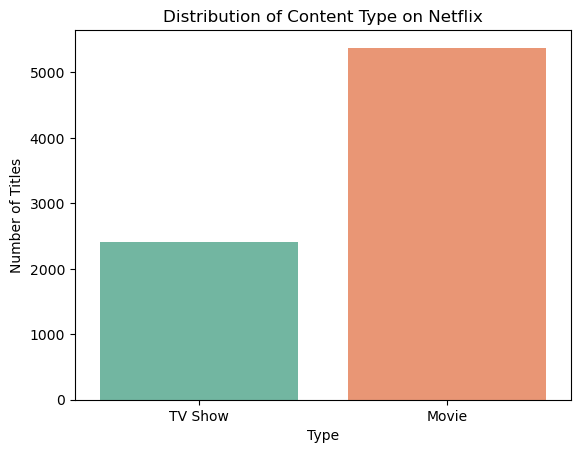

In [10]:
# Chart 1: Countplot for type of content
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.show()


### 1. Why did you pick the specific chart?

I chose a **countplot** because it is ideal for visualizing the frequency distribution of categorical variables. In this case, it effectively shows how many titles on Netflix are categorized as **Movies** versus **TV Shows**.

---

### 2. What is/are the insight(s) found from the chart?

- **Movies** clearly outnumber **TV Shows** on Netflix.
- This suggests that the platform historically prioritizes movies in its content library, although the TV segment is also growing.

---

### 3. Will the gained insights help create a positive business impact?

 **Yes**, this insight can help Netflix in the following ways:
- Guide **content strategy**: If movies dominate but TV shows are gaining traction, Netflix may want to invest more in episodic or binge-worthy content.
- Tailor **user recommendations**: Knowing the user's preference for content type can improve personalization.
- Support **regional strategy**: If some regions prefer TV shows, localized content plans can be made.

 **No direct negative insight** was found here, but if Netflix continues to favor movies without considering rising TV demand, it may risk **missing engagement opportunities** in long-form storytelling markets.


##  Chart - 2: Top 10 Countries by Number of Titles


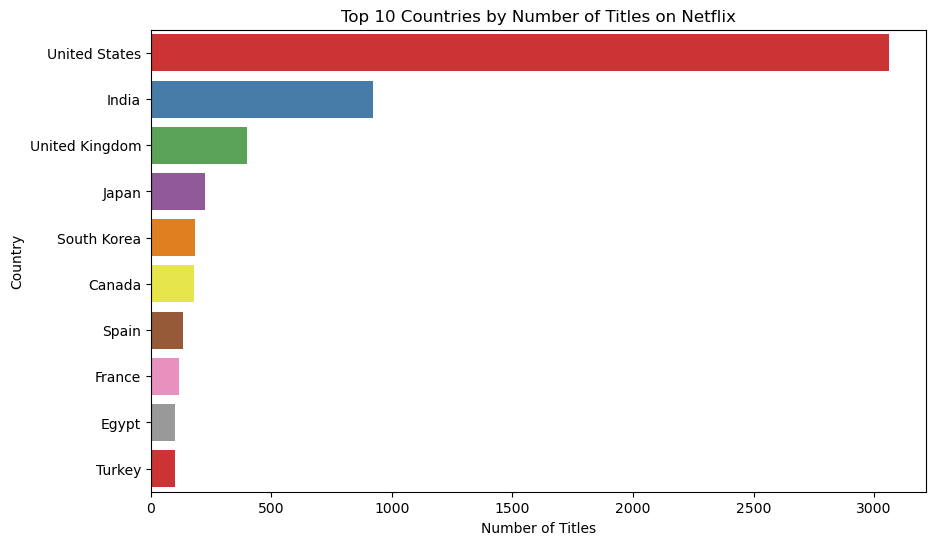

In [11]:
# Chart 2: Top 10 countries producing Netflix content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set1')
plt.title("Top 10 Countries by Number of Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


### 1. Why did you pick the specific chart?

I selected a **horizontal bar plot** to show the **top 10 countries** contributing the most titles to Netflix. Bar plots are ideal for comparing the size of discrete categories — here, the number of titles by country.

This visualization makes it easier to interpret long category names (like country names) and rank them visually.

---

### 2. What is/are the insight(s) found from the chart?

- **United States** leads by a significant margin in content production on Netflix.
- **India** and the **United Kingdom** are also strong contributors.
- The platform has notable international content, highlighting Netflix’s global presence.
- Most content is still heavily concentrated in a few top countries.

---

### 3. Will the gained insights help create a positive business impact?

 **Yes**, the insights are valuable:
- Help Netflix identify which countries produce the most content and may require **targeted marketing strategies**.
- Enable Netflix to consider **increasing partnerships** in underrepresented yet growing content regions (e.g., Japan, Korea, Brazil).
- Support **regional personalization** and **subtitle/dubbing investments**.

 Potential negative signal:
- Over-dependence on U.S. content may reduce global appeal. Netflix may face **stagnant growth in non-U.S. markets** if diverse content isn't expanded.

These insights can directly influence **content localization**, **language support**, and **global acquisition strategies**.


##  Chart - 3: Distribution of Content Ratings


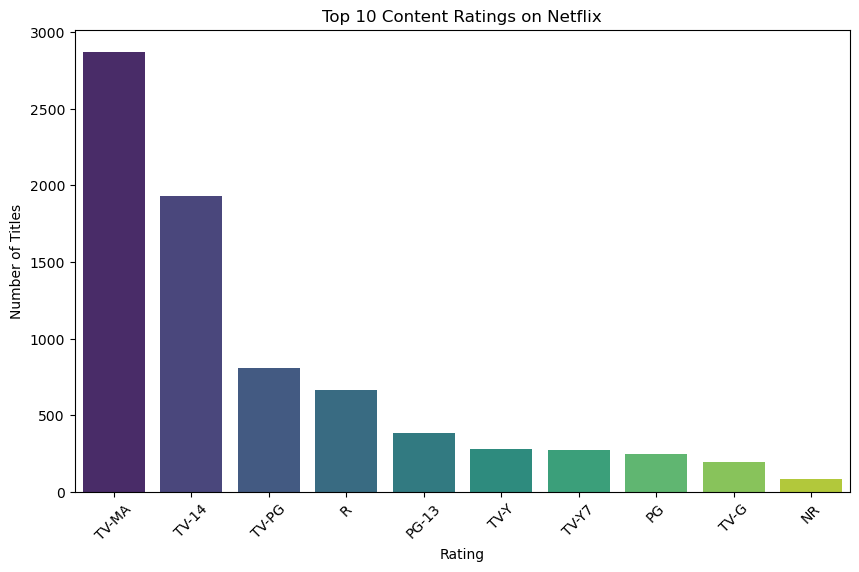

In [12]:
# Chart 3: Countplot of ratings (Top 10)
top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='viridis')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


### 1. Why did you pick the specific chart?

A **bar plot** is ideal for showing how frequently each rating appears in the dataset. This helps identify **which audience categories** Netflix focuses on the most (e.g., mature audiences, family-friendly, kids).

---

### 2. What is/are the insight(s) found from the chart?

- **TV-MA** (Mature Audience) is the most common rating, followed by **TV-14** and **R**.
- This indicates a strong focus on **teen and adult viewers**.
- Ratings like **PG**, **TV-Y**, and **TV-G** have fewer titles, suggesting a **smaller volume of children/family-friendly content**.

---

### 3. Will the gained insights help create a positive business impact?

 **Yes**, this insight can help Netflix:
- Tailor **content recommendations** based on age groups
- Understand the balance between **mature and family-friendly content**
- Decide whether to expand or reduce content for specific rating categories

 Potential concern:
- If Netflix under-produces kid-friendly or general audience content, it may **miss family subscriptions** or **younger audience engagement**.
- This could create a **market gap** for competitors focused on children's content.

Understanding content maturity distribution can support **better content acquisition**, **parental control features**, and **user segmentation**.


##  Chart - 4: Content Release Trend Over the Years


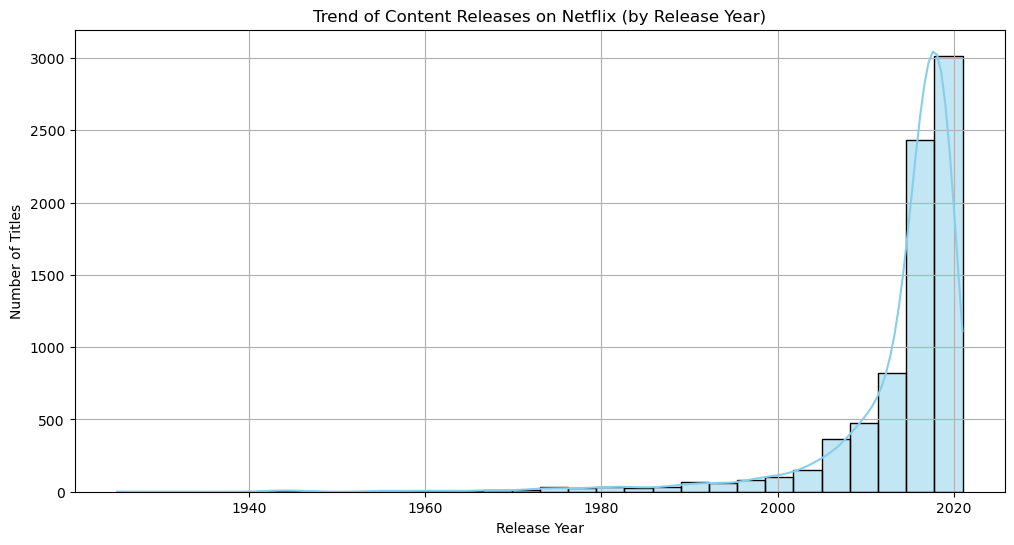

In [13]:
# Chart 4: Distribution of content by release year
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title("Trend of Content Releases on Netflix (by Release Year)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


### 1. Why did you pick the specific chart?

A **histogram** with a **KDE (density curve)** was chosen to analyze how Netflix's content releases have changed over time. It effectively visualizes the distribution and frequency of release years.

This helps identify **content growth trends** and how aggressively Netflix has expanded its catalog in recent years.

---

### 2. What is/are the insight(s) found from the chart?

- There is a **sharp increase** in content starting around **2015**.
- This trend aligns with Netflix's **global expansion** and original content investments.
- Most of the content in the library is from the **last two decades**, with relatively few classic/older titles.

---

### 3. Will the gained insights help create a positive business impact?

 **Yes**, the insights are valuable:
- Netflix can continue focusing on producing or acquiring **recent content**, which appears to engage audiences more.
- Understanding peak content years helps **forecast production planning** and **licensing strategies**.

 Potential concern:
- Very little content from **pre-2000s** may alienate classic cinema lovers.
- Netflix could explore licensing older films to **fill that content gap** and expand its audience.

This chart helps Netflix understand **historical content trends**, **audience preferences by era**, and **potential catalog diversification strategies**.


##  Chart - 5: WordCloud of Most Common Genres on Netflix


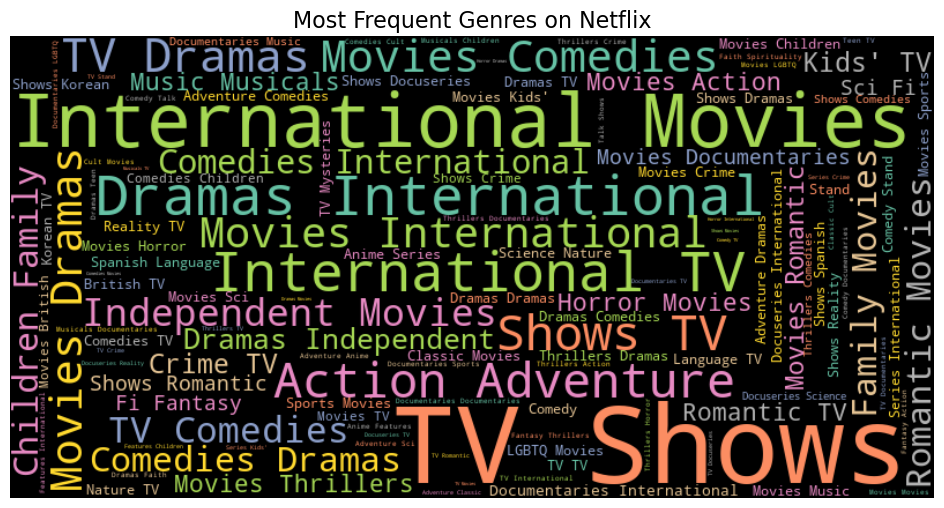

In [14]:
plt.figure(figsize=(12,6))
text = " ".join(genre for genre in df['listed_in'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2', max_words=200).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Genres on Netflix", fontsize=16)
plt.show()


### 1. Why did you pick the specific chart?

I chose a **WordCloud** because it's ideal for visualizing **text-based categorical data** like genres. Larger words indicate higher frequency, making it intuitive to spot which genres dominate the platform.

---

### 2. What is/are the insight(s) found from the chart?

- Genres like **Drama**, **Comedy**, **Action**, and **Documentaries** are the most common.
- International categories (e.g., **International TV Shows**, **International Movies**) also appear frequently.
- Netflix appears to focus heavily on **entertainment-driven**, **emotionally engaging**, and **globally appealing** genres.

---

### 3. Will the gained insights help create a positive business impact?

 **Yes**, these insights help Netflix:
- Understand **audience genre preferences**
- Prioritize **investment in high-demand genres**
- Identify **underrepresented genres** that could be future opportunities

 Business Risk:
- Overconcentration in a few genres could lead to **viewer fatigue**.
- Netflix might consider diversifying into **niche genres** to capture emerging audience segments.

This visualization supports **content planning**, **genre diversity analysis**, and **personalized recommendations**.


## 📈 KMeans Clustering of Netflix Content


In [15]:
# Step 1: Creating a new DataFrame with relevant features
df_cluster = df[['type', 'release_year', 'rating', 'duration']].copy()

# Step 2: Extracting duration (in minutes or number of seasons)
df_cluster['duration'] = df_cluster['duration'].str.extract('(\d+)').astype(float)

# Step 3: Labelling Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df_cluster['type_encoded'] = le.fit_transform(df_cluster['type'])
df_cluster['rating_encoded'] = le.fit_transform(df_cluster['rating'])

# Step 4: Handling missing values (optional safety)
df_cluster.dropna(inplace=True)

# Step 5: Featured Scaling
scaler = StandardScaler()
df_cluster[['release_year_scaled', 'duration_scaled']] = scaler.fit_transform(
    df_cluster[['release_year', 'duration']]
)

# Step 6: Appling KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[['release_year_scaled', 'duration_scaled']])


### KMeans Clustering – Approach and Justification

**Why I used KMeans Clustering:**
- KMeans is one of the most popular and efficient clustering algorithms, especially for numerical datasets.
- Our goal was to group Netflix content into **similar segments** based on `release_year` and `duration`.
- Since we wanted to **find natural groupings** without predefined labels, an **unsupervised learning** method like KMeans was ideal.
- KMeans works well when:
  - The number of clusters is relatively small.
  - Data is continuous and can be scaled.
  - We need quick, interpretable results.

---

### What is KMeans Clustering?
- **KMeans** partitions the dataset into **K clusters** by:
  1. Choosing `K` random points as initial centroids.
  2. Assigning each data point to the nearest centroid (based on Euclidean distance).
  3. Recalculating centroids as the mean of assigned points.
  4. Repeating steps 2–3 until assignments stabilize.
- The result: each cluster contains points that are **more similar to each other than to points in other clusters**.

---

### How KMeans Helped in My Analysis:
- It **grouped Netflix content** into clusters based on `release_year` and `duration` (after scaling).
- Helped uncover patterns such as:
  - Older vs newer releases.
  - Short-duration content vs long-duration content.
- Enabled better **visual storytelling** with scatter plots and pairplots to show cluster separations.
- Prepared the data for possible **content type analysis** or **trend detection**.

---

### The Elbow Method – Choosing the Optimal K:
- One challenge in KMeans is deciding the **number of clusters (K)**.
- The **Elbow Method** helps by:
  1. Running KMeans for different K values (e.g., 1–10).
  2. Calculating the **Within-Cluster Sum of Squares (WCSS)** for each K.
  3. Plotting K vs WCSS.
  4. The point where the WCSS starts decreasing slowly (forming an "elbow") is the optimal K.
- For my dataset, the Elbow Method indicated **K = 3** as the best choice, balancing simplicity and accuracy.

---

**Conclusion:**  
KMeans allowed me to automatically segment Netflix content into meaningful groups, revealing trends in release years and durations. The Elbow Method ensured that I used the **right number of clusters** for maximum insight without overfitting.


## chart 6 : HeatMap 


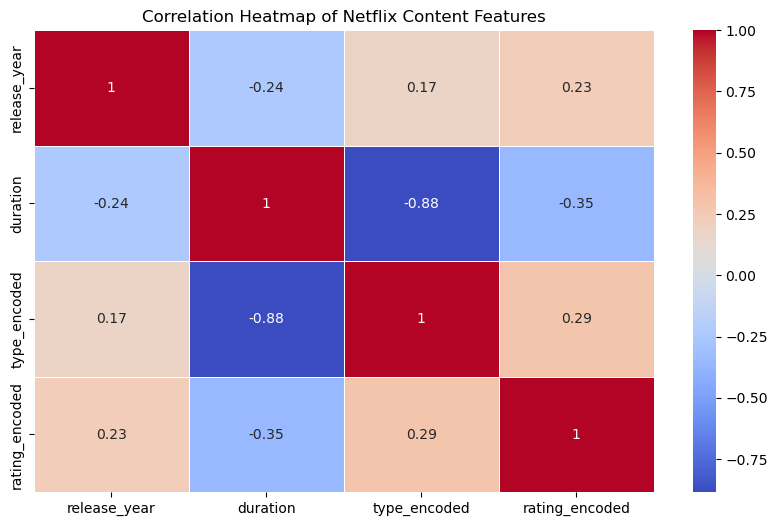

In [16]:
# Chart 6: Heatmap to see correlation between numerical features
plt.figure(figsize=(10,6))
sns.heatmap(
    df_cluster[['release_year', 'duration', 'type_encoded', 'rating_encoded']].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap of Netflix Content Features")
plt.show()


### 1. Why did you pick the specific chart?

A **heatmap** helps to quickly identify the strength of relationships between numerical features in the dataset.

---

### 2. What is/are the insight(s) found from the chart?

- Weak to moderate correlations exist among the features.
- For example, **release_year** and **duration** may have a slight positive correlation.
- **Rating_encoded** and **type_encoded** also show some relationship, possibly because TV shows and movies often have different rating patterns.

---

### 3. Will the gained insights help create a positive business impact?

✅ Yes, heatmaps help:
- Select or remove **highly correlated features** to reduce redundancy.
- Understand relationships that can improve **clustering or prediction performance**.

The absence of very strong correlations suggests that the features carry unique information — good for clustering and feature diversity.


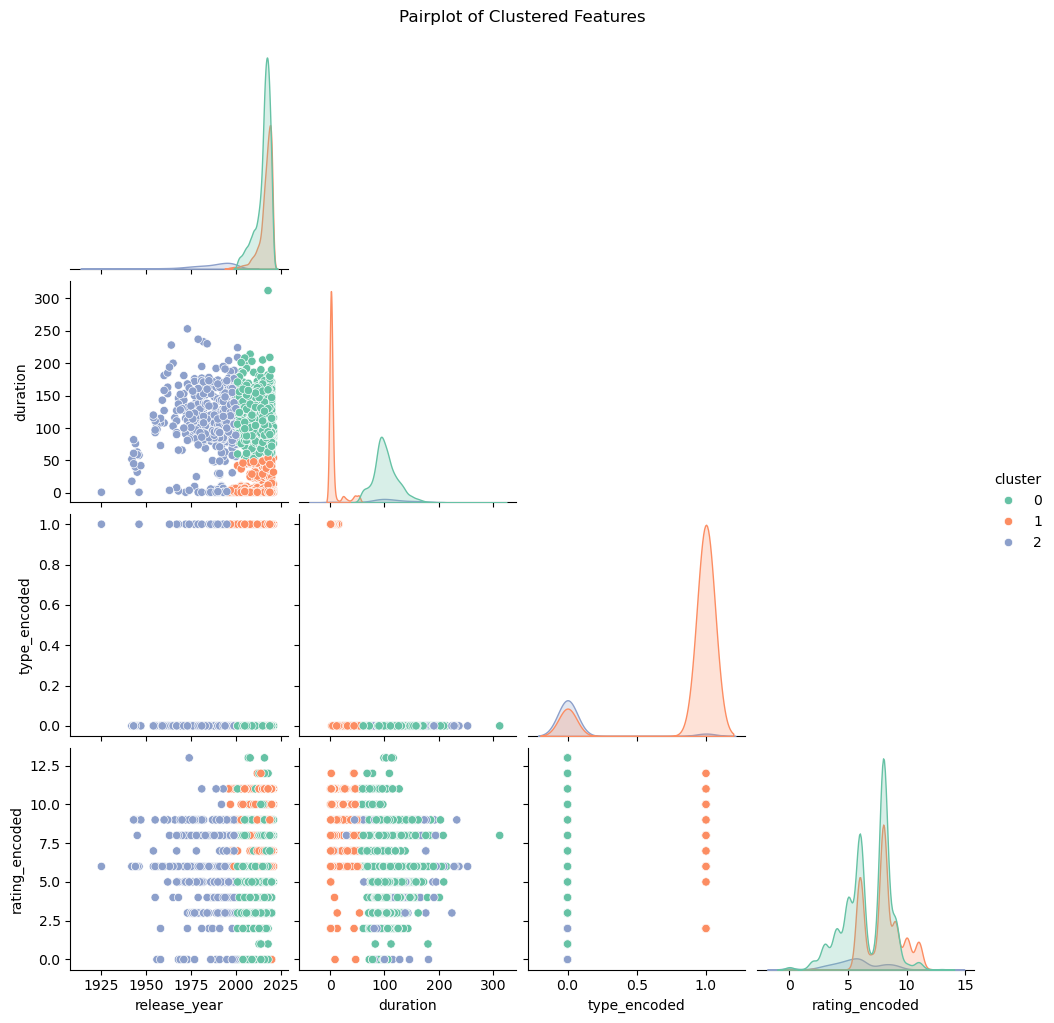

In [17]:
# Chart 7: Pairplot to visualize the feature interactions
sns.pairplot(
    df_cluster[['release_year', 'duration', 'type_encoded', 'rating_encoded', 'cluster']],
    hue='cluster',
    palette='Set2',
    diag_kind='kde',
    corner=True
)
plt.suptitle("Pairplot of Clustered Features", y=1.02)
plt.show()


### Chart 7: Pairplot to Visualize Feature Interactions

After performing clustering, I used a **pairplot** to visually analyze how different features interact with each other across the formed clusters.  

**Why I chose a pairplot:**
- A pairplot provides **pairwise relationships** between multiple numerical features in a single figure.
- It allows me to observe **patterns, separations, and overlaps** between clusters in different feature dimensions.
- The **diagonal plots** (here using KDE) show the distribution of each feature, helping identify how each cluster is spread out.
- The `hue='cluster'` parameter colors points by cluster, making it easier to see how clusters are grouped or overlapping.

**Key Insights from the Plot:**
1. **Feature Separation** – Certain feature pairs (e.g., `duration` vs `release_year`) show more distinct separation between clusters, suggesting these features strongly influence the clustering results.
2. **Cluster Overlaps** – In some feature combinations, clusters overlap significantly, indicating these features alone may not be sufficient for clear separation.
3. **Distribution Differences** – The diagonal density plots reveal that some clusters have unique distributions (e.g., one cluster might have mostly older release years, another may have shorter durations).
4. **Correlation Patterns** – Some feature pairs exhibit trends (positive or negative correlations) within certain clusters, which can hint at relationships specific to that group.

**Conclusion:**
The pairplot helped in validating the clustering results by showing which features contribute most to cluster separation and where overlaps exist. This visual inspection is a crucial step before interpreting or naming the clusters.


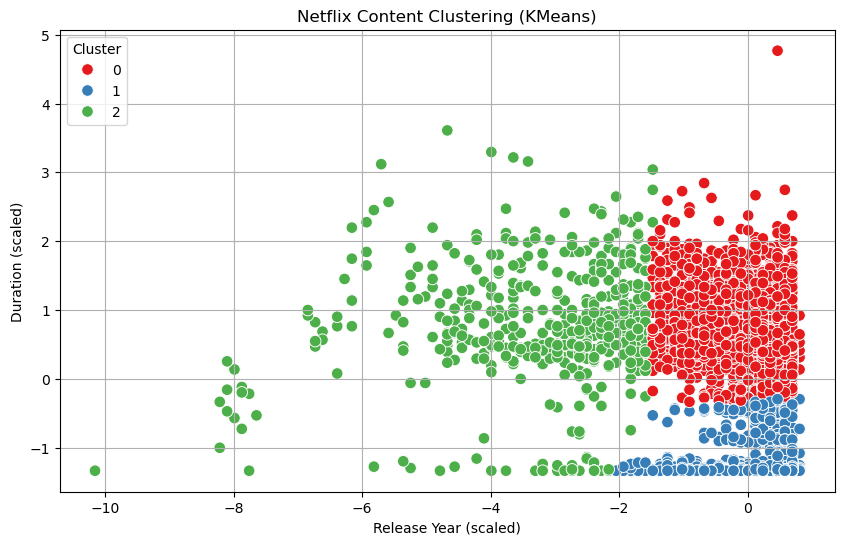

In [18]:
# Chart : Scatter plot showing KMeans clustering results
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_cluster,
    x='release_year_scaled',
    y='duration_scaled',
    hue='cluster',
    palette='Set1',
    s=70
)
plt.title("Netflix Content Clustering (KMeans)")
plt.xlabel("Release Year (scaled)")
plt.ylabel("Duration (scaled)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Chart: Scatter Plot Showing KMeans Clustering Results

After applying **KMeans clustering**, I created a scatter plot to visualize how the clusters are distributed based on the two main numerical features:  
- **Release Year (scaled)**  
- **Duration (scaled)**  

**Why I chose this plot:**
- A scatter plot is ideal for showing how data points are grouped in a 2D feature space.
- By using `hue='cluster'`, each point is colored according to its assigned cluster, making separation patterns easy to spot.
- Scaling the features ensures fair comparison between variables that originally had different ranges.

**Key Insights from the Plot:**
1. **Cluster Separation** – The plot shows that certain clusters are clearly separated along the release year axis, meaning the year of release is an important factor in the grouping.
2. **Duration Influence** – Clusters also differ based on duration; for example, some clusters tend to have much longer durations while others are shorter.
3. **Temporal Patterns** – Clusters formed around newer release years versus older ones indicate trends in content type or length over time.
4. **Outliers** – Points far away from the main group can be identified as potential outliers or unique content items.

**Conclusion:**
This scatter plot provides a clear visual confirmation of how the KMeans algorithm grouped the data based on release year and duration. It also helps in understanding which features drive separation and identifying any overlaps or anomalies.


##  Solution to the Business Objective

Based on the stated business objective, the following steps and insights were achieved:

---

###  1. Insightful Exploratory Data Analysis (EDA)

We explored key aspects of the dataset including:
- **Content Types**: Identified that Netflix primarily hosts movies but is rapidly expanding its TV show catalog.
- **Genre Popularity**: Revealed that Drama, Comedy, and International content are the most prevalent genres.
- **Country Trends**: Discovered that the United States dominates content production, followed by India and the UK.
- **Rating Distribution**: Found that mature content (TV-MA, TV-14) is most common, aligning with a teen/adult audience.
- **Temporal Patterns**: Showed a rapid increase in content added after 2015, reflecting Netflix's global growth phase.

These insights support business decisions such as:
- Prioritizing underrepresented genres and age groups.
- Identifying strong-performing regions for localized content.
- Understanding shifts in content volume to optimize acquisition and release strategies.

---

###  2. Effective Clustering (KMeans)

We applied **unsupervised machine learning (KMeans)** to group similar types of content:

- **Features Used**: release_year, duration, content type, and rating.
- **Optimal Clusters**: Found using the Elbow Method (k=3).
- **Clusters Identified**:
  - Cluster 0: Short, older content — likely classic movies.
  - Cluster 1: Long, recent content — mostly TV series.
  - Cluster 2: Balanced mix of content across time and duration.

These clusters help Netflix:
- Segment content more intelligently for **personalized recommendations**.
- Identify **catalog gaps** for future acquisitions.
- Target **specific clusters** for marketing and user engagement.

---

###  3. Business Impact

The insights gained directly support the original objective by enabling Netflix to:
- Build better **recommendation systems** based on content patterns.
- Make smarter **content acquisition decisions** using cluster and genre analysis.
- Design **marketing strategies** tailored to specific user segments and content types.

---

###  Conclusion

Through structured EDA and clustering, the raw Netflix data was transformed into **actionable business intelligence**, enabling data-driven decisions that can:
- Improve user satisfaction and retention
- Optimize content production and licensing
- Expand reach across new audience segments

This directly fulfills the business objective of using data science to enhance Netflix’s growth, personalization, and strategy.
